# Company 2 Company Business Analytics

This project will work on a fashion customer-to-customer (C2C) e-commerce platform that enables users to sell products to other users on the platform. The performance of a seller on the platform does not only depend on the user interface of the C2C platform, but it is also a function of the type of products uploaded by the seller, the image quality of the product, its description, customer service and social engagement of sellers (The factors are not limited to those stated). The following insights will be drawn from the available data: • Factors that contribute to sellers being able to generate good sales from the e-commerce platform • What is the typical lifetime value of a customer on the platform? • What is the average retention rate of buyers on the e-commerce platform? • Considering that the platform is situated in France, what is the tendency that other users from other countries will sign up on the platform. • How active are users generally on the e-commerce platform?

## Exploratory Data Analysis
* Build data profile tables and plots
* Outliers & Anomalies
* Explore data relationships
* Identification and creation of features

Kindly use the link below to gain access to the plots for this analysis on Tableau

https://public.tableau.com/views/C2CEDAAnalysis/SellersDashboard?:language=en&:display_count=y&publish=yes&:origin=viz_share_link

## Importing Packages

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from langdetect import detect, DetectorFactory
from textblob import TextBlob
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns

### Import Original and Cleaned Data Frame

In [2]:
path = '/Users/oluwafemibabatunde/Desktop/Springboard/C2C Business France'
os.chdir(path)
dfOriginal = pd.read_csv('6M-0K-99K.users.dataset.public.csv')
dfOriginal.head()

,identifierHash,type,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,...,civilityTitle,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,countryCode
0,-1097895247965112460,user,Royaume-Uni,en,147,10,77,26,174,74.0,...,mr,True,False,True,True,11,3196,106.53,8.88,gb
1,2347567364561867620,user,Monaco,en,167,8,2,19,170,99.0,...,mrs,True,False,True,True,12,3204,106.80,8.90,mc
2,6870940546848049750,user,France,fr,137,13,60,33,163,94.0,...,mrs,True,False,True,False,11,3203,106.77,8.90,fr
3,-4640272621319568052,user,Etats-Unis,en,131,10,14,122,152,92.0,...,mrs,True,False,True,False,12,3198,106.60,8.88,us
4,-5175830994878542658,user,Etats-Unis,en,167,8,0,25,125,100.0,...,mrs,False,False,False,True,22,2854,95.13,7.93,us


In [3]:
path = '/Users/oluwafemibabatunde/Desktop/Springboard/capstone_three/C2C Business Analytics/data'
os.chdir(path)
dfProcessed = pd.read_csv('step1DF_output.csv')

In [4]:
dfProcessed.head()

,Unnamed: 0,identifierHash,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,...,gender_F,gender_M,civilityTitle_miss,civilityTitle_mr,civilityTitle_mrs,lang_de,lang_en,lang_es,lang_fr,lang_it
0,0,-1097895247965112460,147,10,77,26,174,74.0,104,1,...,0,1,0,1,0,0,1,0,0,0
1,1,2347567364561867620,167,8,2,19,170,99.0,0,0,...,1,0,0,0,1,0,1,0,0,0
2,2,6870940546848049750,137,13,60,33,163,94.0,10,3,...,1,0,0,0,1,0,0,0,1,0
3,3,-4640272621319568052,131,10,14,122,152,92.0,7,0,...,1,0,0,0,1,0,1,0,0,0
4,4,-5175830994878542658,167,8,0,25,125,100.0,0,0,...,1,0,0,0,1,0,1,0,0,0


In [5]:
dfProcessed = dfProcessed.drop(['Unnamed: 0'], axis=1)

In [6]:
dfProcessed.describe()

,identifierHash,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,civilityGenderId,...,gender_F,gender_M,civilityTitle_miss,civilityTitle_mr,civilityTitle_mrs,lang_de,lang_en,lang_es,lang_fr,lang_it
count,9.891300e+04,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,...,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000
mean,-6.692039e+15,3.432269,8.425677,4.420743,0.093304,0.121592,0.812303,1.562595,0.171929,1.773993,...,0.769575,0.230425,0.004418,0.230425,0.765157,0.072569,0.521307,0.060993,0.266618,0.078513
std,5.330807e+18,3.882383,52.839572,181.030569,2.050144,2.126895,8.500205,25.192793,2.332266,0.428679,...,0.421107,0.421107,0.066322,0.421107,0.423903,0.259429,0.499548,0.239319,0.442193,0.268979
min,-9.223101e+18,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-4.622895e+18,3.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-1.337989e+15,3.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,4.616388e+18,3.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,9.223331e+18,744.000000,13764.000000,51671.000000,244.000000,174.000000,100.000000,2635.000000,405.000000,3.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Split DataFrame based On Segments Of Sellers and Buyers 

The assumption here is that users with sold products of more than 0. The best column that would have captured seller would have been product listed as some seller might have listed products but never sold 1. However, on this dataframe, the product listed captures products currently in the inventory.

In [7]:
dfProcessed.shape

(98913, 229)

In [8]:
dfSold = dfProcessed[dfProcessed['productsSold']>0]

In [9]:
dfSold.shape

(2036, 229)

Based on the condition stated above, only 2,036 of the total users can be categorized as sellers on the e-commerce store during the period under review

Total products sold on the platform by sellers was 12,027

In [10]:
dfProcessed['productsSold'].sum()

12027

There were 12,027 total products sold on the C2C e-commerce.

In [11]:
dfBuyer = dfProcessed[dfProcessed['productsBought']>0]

In [12]:
dfBuyer.shape

(5419, 229)

Also, 5,419 of the 98,913 users on the e-commerce platform have purchased atleast one item on the platform.

Total products bought on the platform during the period covered was 17,006

In [13]:
dfProcessed['productsBought'].sum()

17006

In [14]:
dfSellBuy = dfProcessed[dfProcessed['productsSold'] > 0]
dfSellBuy = dfSellBuy[dfSellBuy['productsBought'] > 0]
dfSellBuy.shape

(562, 229)

There were 562 users that sold and bought atleast one product on the platform during the period under review

In [15]:
dfNoTrans = dfProcessed[dfProcessed['productsSold'] == 0]
dfNoTrans = dfNoTrans[dfNoTrans['productsBought'] == 0]
dfNoTrans.shape


(92020, 229)

It is noteworthy that 93% of users on the platform did notsell neither purchased any item on the platform during the period under review

The following tables explores how countries perform with respect to products sold and bought

In [16]:
dfOriginal.country.nunique()

200

There are total of 200 countries in the database

In [17]:
dfCountrySold = dfOriginal[['country','productsSold']].groupby(by = 'country').sum().sort_values(by='productsSold', ascending=False)

In [18]:
dfCountrySold = dfCountrySold[dfCountrySold['productsSold']>0]

In [19]:
dfCountrySold.shape

(42, 1)

Of the 200 countries, 42 of them had sales of 1 and above.

The top 10 countries are:

In [20]:
dfCountrySold.head(10)

,productsSold
country,
France,3014
Italie,2820
Royaume-Uni,1806
Espagne,990
Etats-Unis,967
Allemagne,536
Suède,336
Pays-Bas,214
Monaco,190


France, Italy, the UK, Spain and the USA sold the most number of products in the database

In [21]:
dfCountryBought = dfOriginal[['country','productsBought']].groupby(by = 'country').sum().sort_values(by='productsBought', ascending=False)
dfCountryBought = dfCountryBought[dfCountryBought['productsBought']>0]
dfCountryBought.shape

(62, 1)

There are 62 countries where transactions occured on the platform

In [22]:
dfCountryBought.head(10)

,productsBought
country,
France,3573
Etats-Unis,2370
Royaume-Uni,2174
Allemagne,1635
Italie,1221
Espagne,1028
Belgique,718
Suède,566
Pays-Bas,537


Users from France, the USA, the UK, Germany and Italy, in that order had highest numbers of purchases on the platform

Average number of days sellers last logged in on the platform: 

In [23]:
round(dfSold['daysSinceLastLogin'].mean(), 0)

191.0

As expected, sellers average last log in on the platform is 191 days. This is quite high. That is 6 months and 12 days.

In [24]:
round(dfBuyer['daysSinceLastLogin'].mean(), 0)

290.0

Buyers' average last log in on the platform is higher than that of sellers. This number of days tranlates to roughly 10 months on average for buyers' login

In [25]:
round(dfNoTrans['daysSinceLastLogin'].mean(), 0)

604.0

Users with no transaction history on the platform have the least mean value for last login days. This is expected as alot of individuals could register the account just to view how the platform operates. It should also be noted that this platform might be one that does not allow users to access it without getting registered first. This might explain reason for the high user registration and the low retention on the platform

Buyers' average log in on the platform is higher than sellers'. Buyers visited the platform on average every 10 months. For a business platform, the retention will need to be improved upon for both buyers and sellers.

The table below shows the number of sellers per country

In [53]:
dfSeller1 = dfOriginal[dfOriginal['productsSold']>0]
dfSeller1 = dfSeller1[['country','identifierHash']].groupby(by = 'country').count().sort_values(by='identifierHash', ascending=False)
dfSeller1.head()

,identifierHash
country,
France,713
Italie,347
Royaume-Uni,289
Etats-Unis,150
Espagne,119


In [54]:
dfBuyer1 = dfOriginal[dfOriginal['productsBought']>0]
dfBuyer1 = dfBuyer1[['country','identifierHash']].groupby(by = 'country').count().sort_values(by='identifierHash', ascending=False)
dfBuyer1.head()

,identifierHash
country,
France,1251
Etats-Unis,912
Royaume-Uni,792
Allemagne,578
Italie,400


France had the most buyer as expected. The USA, UK, Germany and Italy form the remaining top 5 

For the group that has bought and sold atleast one product on the platform, the average last log in can be calculated as:

In [27]:
round(dfSellBuy['daysSinceLastLogin'].mean(), 0)

85.0

This group's average last log in days is quite low compared to the two main groups of buyers and sellers on the platform. Appealing to users on the platform to sell and buy will improve the frequency of visit to the platform

Identifying Users Per Country

In [28]:
dfUserPerCountry = dfOriginal[['country','identifierHash']].groupby(by = 'country').count().sort_values(by='identifierHash', ascending=False)

In [29]:
dfUserPerCountry.head(20)

,identifierHash
country,
France,25135
Etats-Unis,20602
Royaume-Uni,11310
Italie,8015
Allemagne,6567
Espagne,5706
Australie,2719
Danemark,1892
Suède,1826


Going by the above table, France has the highest number of users on the platform. This was expected as the platform is a French one. The USA, UK, Italy and Germany ranked 2nd to 5th in that order

Viewing the social activeness of sellers on the platform

In [30]:
dfSocialSellers = dfOriginal[['country','productsSold','productsBought','socialNbFollowers','socialNbFollows','daysSinceLastLogin']].sort_values(by='socialNbFollowers', ascending=False)

In [31]:
dfSocialSellers[dfSocialSellers['socialNbFollowers']>=50].head(20)

,country,productsSold,productsBought,socialNbFollowers,socialNbFollows,daysSinceLastLogin
8,Italie,104,0,744,13764,14
158,France,15,0,353,8268,31
1119,France,1,0,205,2013,45
17,Espagne,81,0,176,60,11
57,Italie,34,0,172,50,11
1,Monaco,170,0,167,8,12
4,Etats-Unis,125,0,167,8,22
0,Royaume-Uni,174,1,147,10,11
2,France,163,3,137,13,11
3,Etats-Unis,152,0,131,10,12


Based on the above table on social activenes of users on the platform, it can easily be seen that in general  users with high followers tend to sell more products on the platform. The relationship between products sold and followers on the platform will be seen using the correlation matrix and heatmap. The table above shows that having high number of followers or following high number of users on the platform does not mean such user will buy proucts on the platform. The user from Sweden stood out in the data set with number of users with high number of followers. What's the relationship like for buyers on the platform?

In [55]:
dfSocialBuyers = dfOriginal[['country','productsBought','socialNbFollowers','socialNbFollows','daysSinceLastLogin']].sort_values(by='socialNbFollows', ascending=False)

In [56]:
dfSocialBuyers[dfSocialBuyers['productsBought']>=50].head(20)

,country,productsBought,socialNbFollowers,socialNbFollows,daysSinceLastLogin
2046,Etats-Unis,52,36,482,11
44,Etats-Unis,69,53,61,11
127,Italie,54,48,28,11
22,France,115,73,27,11
324,Etats-Unis,174,43,23,11
472,Luxembourg,53,22,14,12
1153,Etats-Unis,77,17,14,11
671,Etats-Unis,58,12,12,12
403,Espagne,65,33,11,11
1134,Australie,67,28,11,11


Top buyers on the platform tend not to be following a lot of other users. It should also be noted that good number of these top buyers logged in recently. Assuption: for this study, the last day since login of 11 should be considered as 0 as the data processing might have occured 11 days after the original data was scrapped from the C2C website. As a result, 11 will be discounted from last day of log in.

In [34]:
dfProcessed['daysSinceLastLogin'] = dfProcessed['daysSinceLastLogin'] - 11

In [35]:
dfProcessed.head()

,identifierHash,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,civilityGenderId,...,gender_F,gender_M,civilityTitle_miss,civilityTitle_mr,civilityTitle_mrs,lang_de,lang_en,lang_es,lang_fr,lang_it
0,-1097895247965112460,147,10,77,26,174,74.0,104,1,1,...,0,1,0,1,0,0,1,0,0,0
1,2347567364561867620,167,8,2,19,170,99.0,0,0,2,...,1,0,0,0,1,0,1,0,0,0
2,6870940546848049750,137,13,60,33,163,94.0,10,3,2,...,1,0,0,0,1,0,0,0,1,0
3,-4640272621319568052,131,10,14,122,152,92.0,7,0,2,...,1,0,0,0,1,0,1,0,0,0
4,-5175830994878542658,167,8,0,25,125,100.0,0,0,2,...,1,0,0,0,1,0,1,0,0,0


In [36]:
dfcorr = dfOriginal.corr()
dfcorr

,identifierHash,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,civilityGenderId,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears
identifierHash,1.000000,0.002017,0.003891,0.002188,0.004254,0.002178,0.001064,-0.003878,-0.000930,0.002614,-0.003470,0.003038,-0.005249,-0.000874,-0.002795,0.002643,0.002642,0.002642
socialNbFollowers,0.002017,1.000000,0.702766,0.653540,0.343603,0.627167,0.351293,0.334733,0.147573,0.013622,0.088570,0.027360,0.084025,-0.286141,-0.159292,0.006034,0.006028,0.006030
socialNbFollows,0.003891,0.702766,1.000000,0.809462,0.091306,0.175296,0.055519,0.266589,0.006406,0.001672,0.011264,0.001590,0.011391,-0.041700,-0.019811,0.004150,0.004151,0.004168
socialProductsLiked,0.002188,0.653540,0.809462,1.000000,0.044845,0.181755,0.059395,0.349138,0.064741,0.005771,0.027030,0.006367,0.026401,-0.063859,-0.055166,-0.001000,-0.000999,-0.000977
productsListed,0.004254,0.343603,0.091306,0.044845,1.000000,0.589793,0.361279,0.066384,0.067782,0.010018,0.038778,0.007728,0.038941,-0.138434,-0.112651,-0.002707,-0.002707,-0.002733
productsSold,0.002178,0.627167,0.175296,0.181755,0.589793,1.000000,0.514101,0.127732,0.113755,0.006866,0.060466,0.015744,0.058859,-0.179571,-0.138637,0.003074,0.003073,0.003089
productsPassRate,0.001064,0.351293,0.055519,0.059395,0.361279,0.514101,1.000000,0.090998,0.126696,0.011697,0.092257,0.030102,0.087844,-0.267112,-0.223065,0.001417,0.001415,0.001434
productsWished,-0.003878,0.334733,0.266589,0.349138,0.066384,0.127732,0.090998,1.000000,0.391640,0.012021,0.047562,0.026736,0.040722,-0.103533,-0.136508,-0.004053,-0.004052,-0.004042
productsBought,-0.000930,0.147573,0.006406,0.064741,0.067782,0.113755,0.126696,0.391640,1.000000,-0.001330,0.044701,0.019118,0.041673,-0.099806,-0.153429,-0.001138,-0.001136,-0.001147
civilityGenderId,0.002614,0.013622,0.001672,0.005771,0.010018,0.006866,0.011697,0.012021,-0.001330,1.000000,-0.084070,-0.039205,-0.070743,-0.006586,-0.038104,-0.001969,-0.001970,-0.001956


Text(0.5, 1, 'Heat Map')

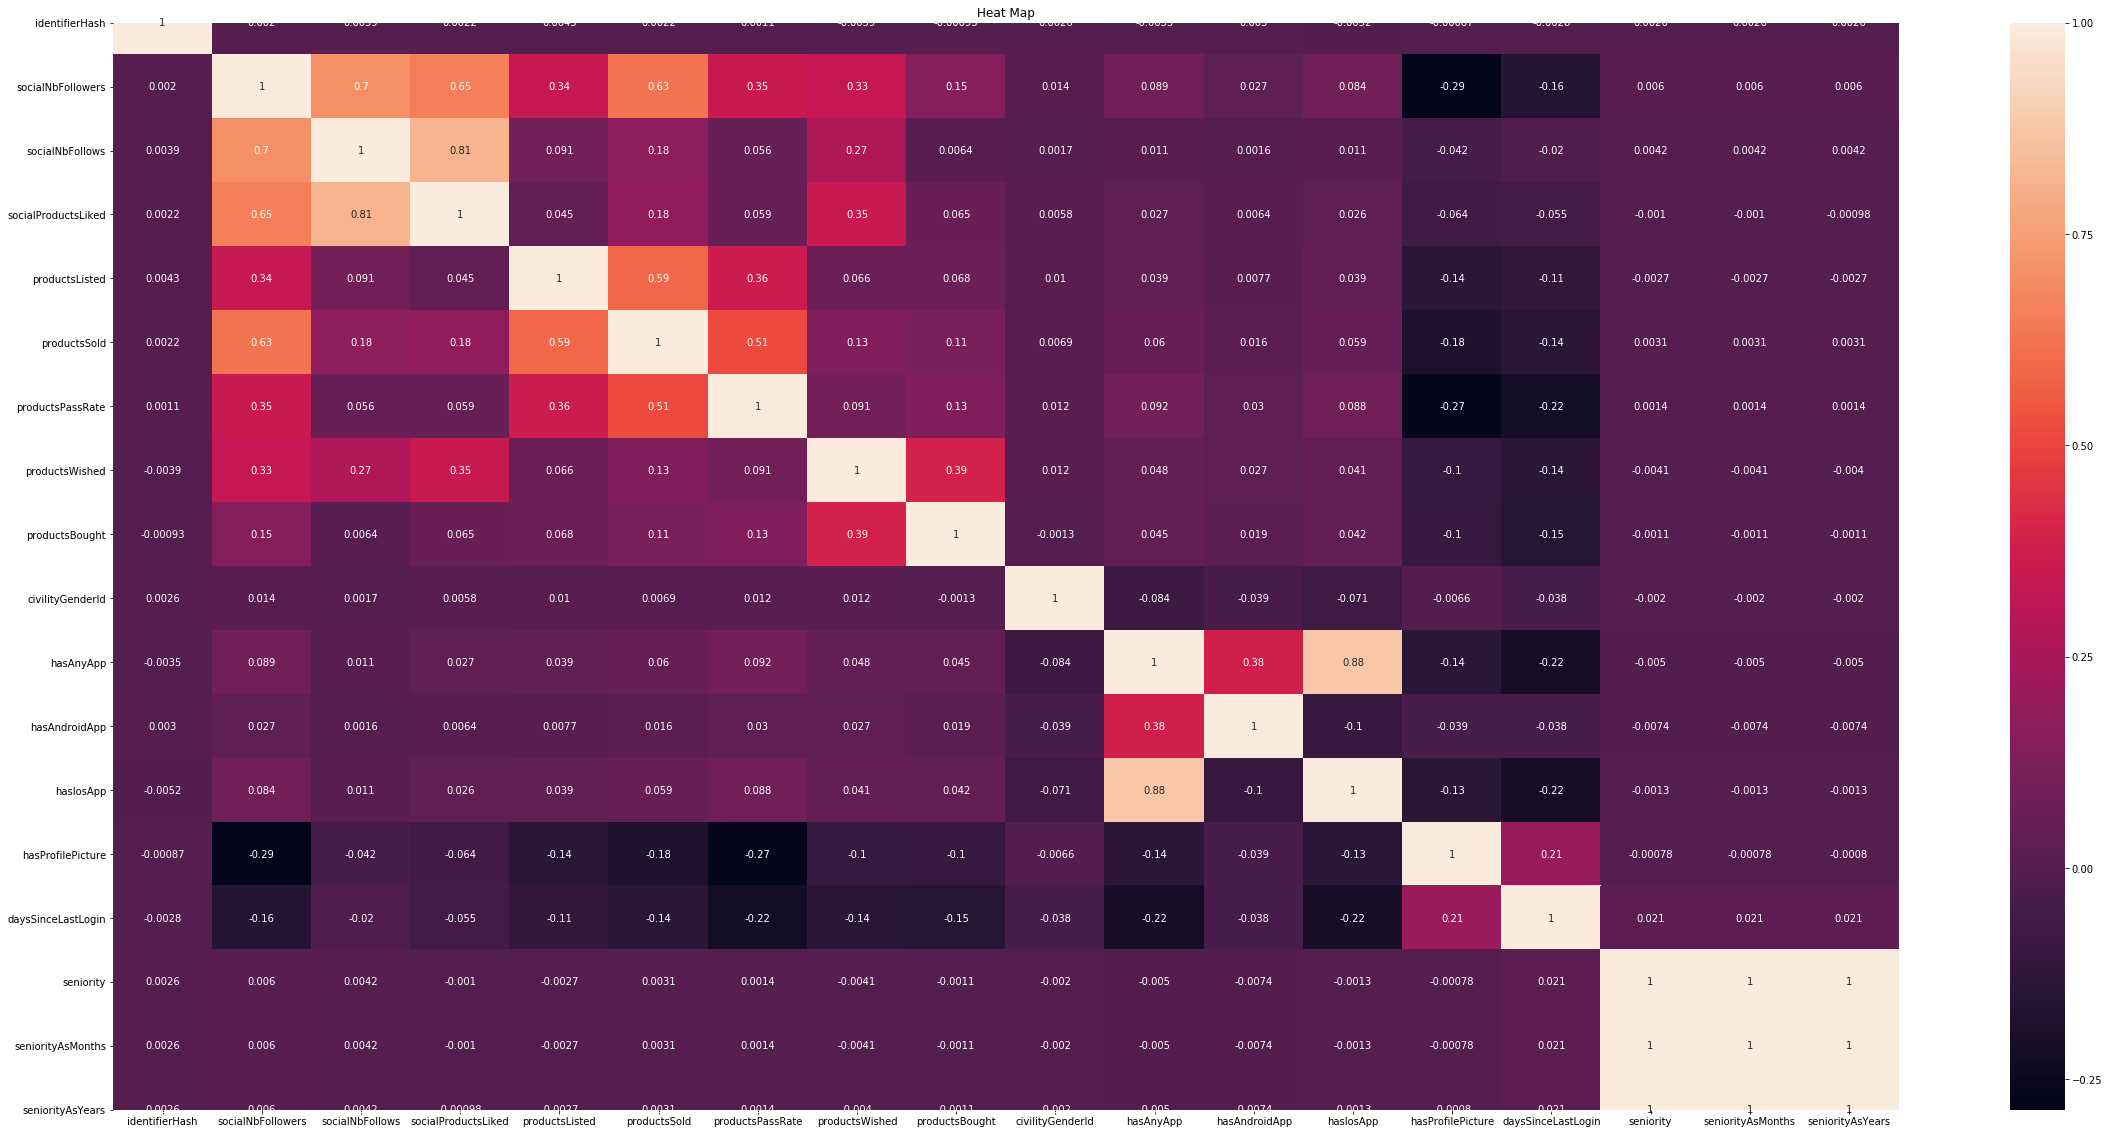

In [37]:
plt.figure(figsize=(40,20))
heatmap = sns.heatmap(dfOriginal.corr(), annot = True)
plt.title('Heat Map')

From the heatmap above, there are obvious strong relationships between some of the features in the dataframe. 
The focus of this correlation matrix will be on productsSold and productsBought. ProductsSold has strong relationship with SocialNbfollowers, productsListed, and productsPassRate in this decreasing order. Weak positive relationships exist with socialNBFollows, socialProductsLiked, productsWished and productsBought. The strong correlation relationships seen between productsSold and some of the variables are expected to exist. The not so very strong relationship with productsBought is abit surprising. Weak negative relationships exist between productsSold and hasProfilePicture. Also, the negative relationship is also seen with daysSinceLastLogin. The negative relationship shows that the more a seller is away from the platform, the lesser he sells. This is intuitive. The only thing here is that it is a weak negative relationship.  
On the other hand, as expected, productsBought got the strongest correlation with productsWished. productsBought shows weak prostive relationships with productspassRate and socialNbFollowers. The same negative relationships seen with productsSold exist with productsBought. The relationship between productsListed and productsBought is postive but very weak (infact, it can be assumed there is no relationship between these variables).
On a general note, productsWished shows strong positive relationships with social activeness on the platform. Is it safe to say alot of people go on the platform to make social connections or "windowshop"? 
The strong positive relationship between number of followers and number followed by users is expected. Also, products liked strongly correlates with SocialNbfollowers and SocialNbfollows. socialProductsLiked has a weak positive correlation with productsSold,productsWished and productsBought(the relationship is postive but very weak as stated above). The relationship between productsListed and productsBought is postive but very weak. PassRate and socialNBFollowers are both positively correlated to productListed.
There is multicollinearity between seniority, seniorityAsMonths and seniorityAsYears. This is expected because seniorityAsMonths and seniorityAsYears are derivatives of seniority. For modelling purpose, seniorityAsMonths and seniorityAsYears will be dropped off and the seniority feature alone will be worked with.


In [38]:
dfProcessed = dfProcessed.drop(['seniorityAsMonths', 'seniorityAsYears'], axis =1)

In [39]:
dfOriginal.columns

Index(['identifierHash', 'type', 'country', 'language', 'socialNbFollowers',
       'socialNbFollows', 'socialProductsLiked', 'productsListed',
       'productsSold', 'productsPassRate', 'productsWished', 'productsBought',
       'gender', 'civilityGenderId', 'civilityTitle', 'hasAnyApp',
       'hasAndroidApp', 'hasIosApp', 'hasProfilePicture', 'daysSinceLastLogin',
       'seniority', 'seniorityAsMonths', 'seniorityAsYears', 'countryCode'],
      dtype='object')

In [40]:
df_segment = dfOriginal[['socialNbFollowers',
       'socialNbFollows', 'socialProductsLiked', 'productsListed',
       'productsSold', 'productsPassRate', 'productsWished', 'productsBought',
       'gender', 'civilityGenderId', 'civilityTitle', 'hasAnyApp',
       'hasAndroidApp', 'hasIosApp', 'hasProfilePicture', 'daysSinceLastLogin',
       'seniority', 'seniorityAsMonths', 'seniorityAsYears']]

In [41]:
column = ['socialNbFollowers',
       'socialNbFollows', 'socialProductsLiked', 'productsListed',
       'productsSold', 'productsPassRate', 'productsWished', 'productsBought', 'civilityGenderId',  'hasAnyApp',
       'hasAndroidApp', 'hasIosApp', 'hasProfilePicture', 'daysSinceLastLogin',
       'seniority', 'seniorityAsMonths', 'seniorityAsYears']

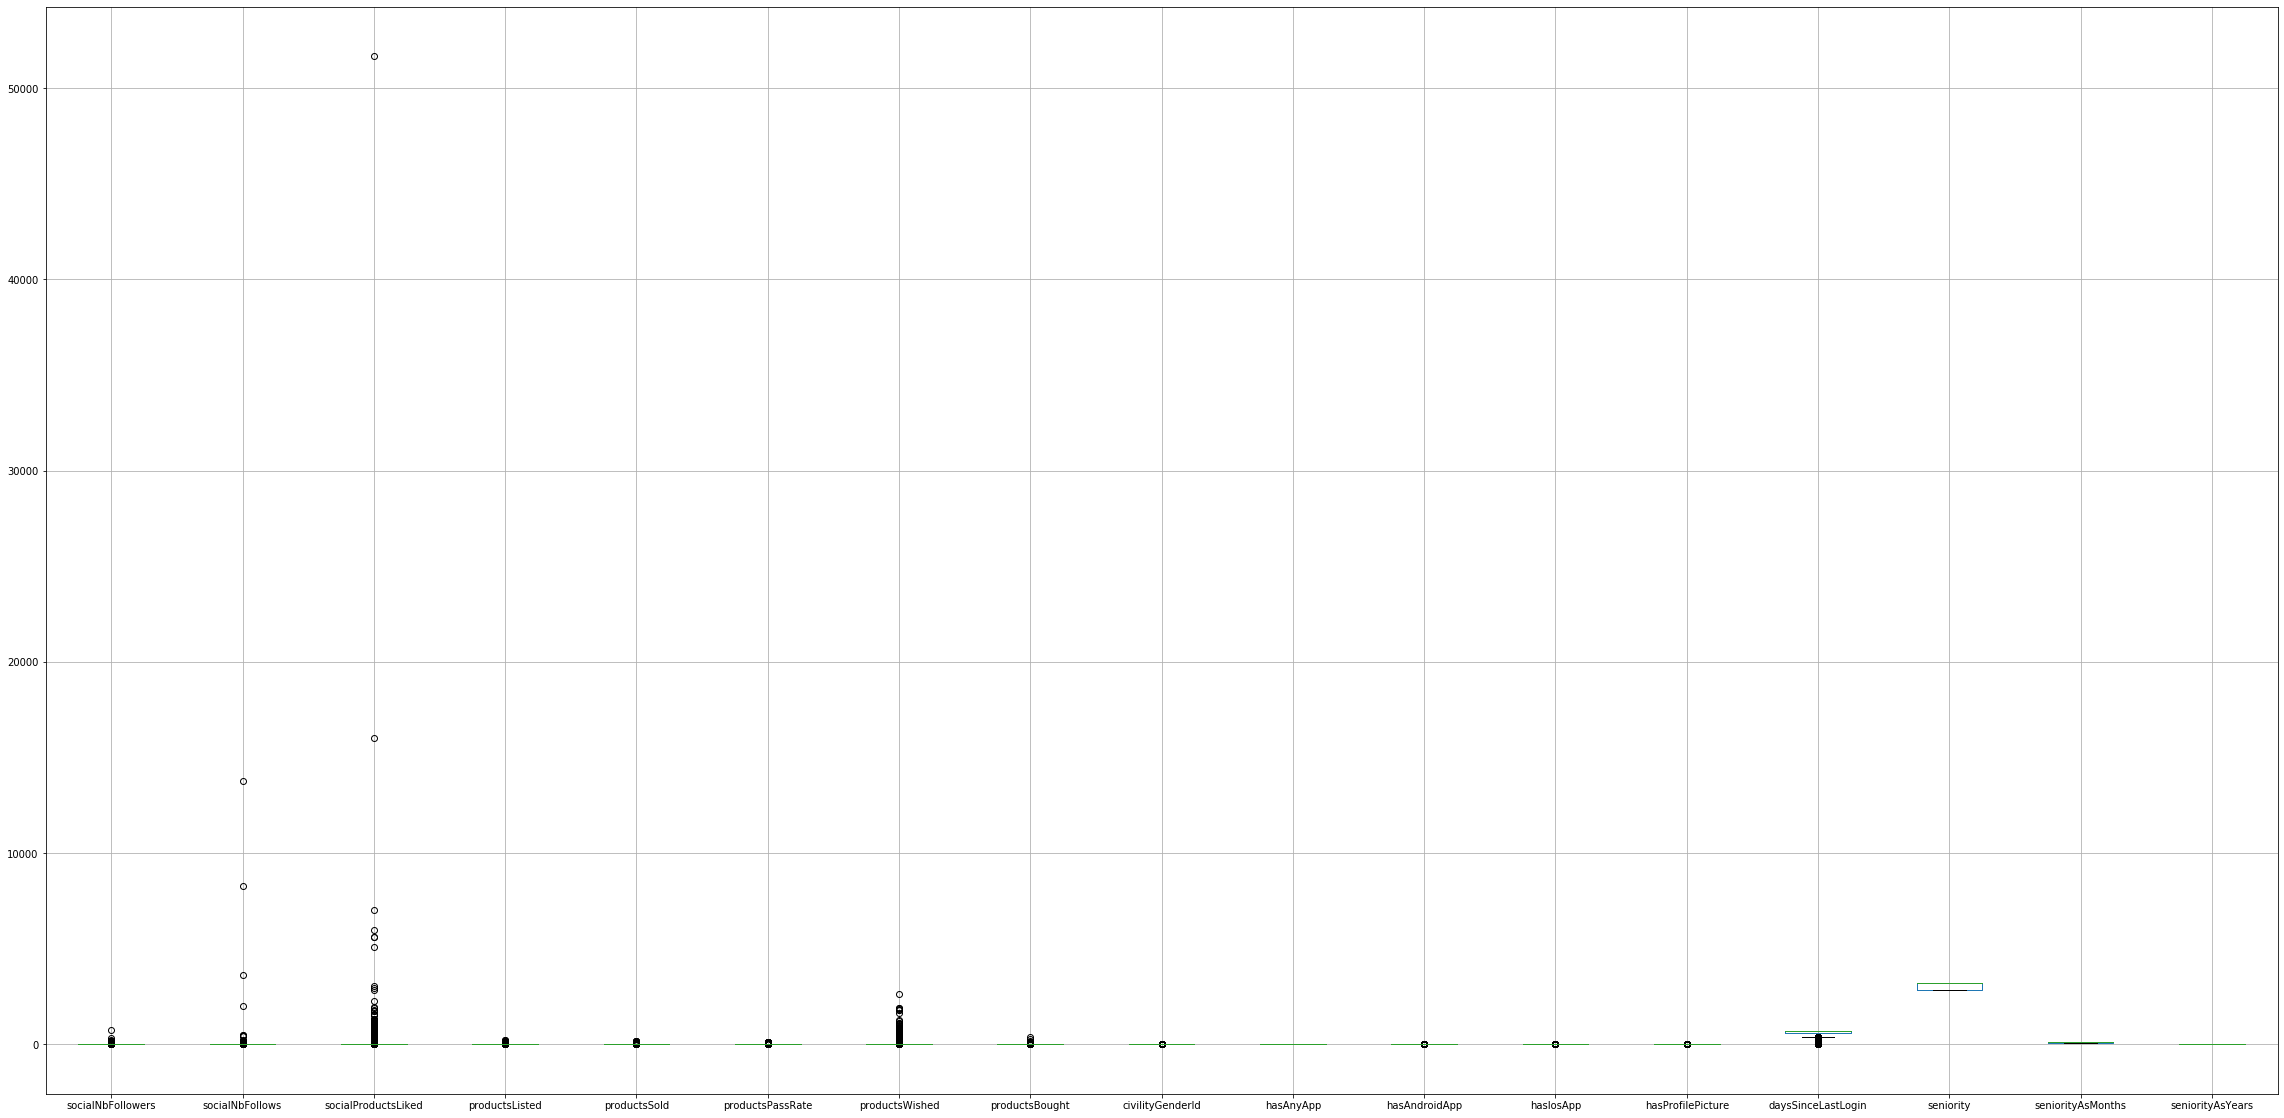

In [42]:
plt.figure(figsize=(40,20))
df_segment.boxplot(column = column)

Using the boxplot, there are obvious outliers in the dataframe. socialProductProductsLiked and socialNbFollows have datapoints far from others. The outliers in the dataset will be adjusted using the IQR method.

In [43]:
Q1 = dfProcessed[['socialNbFollows', 'socialProductsLiked']].quantile(0.25)
Q3 = dfProcessed[['socialNbFollows', 'socialProductsLiked']].quantile(0.75)
IQR = Q3 - Q1

In [44]:
dfProcessed1 = dfProcessed[~((dfProcessed < (Q1 - 1.5 * IQR)) |(dfProcessed > (Q3 + 1.5 * IQR))).any(axis=1)]

In [45]:
dfProcessed1.describe()

,identifierHash,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,civilityGenderId,...,gender_F,gender_M,civilityTitle_miss,civilityTitle_mr,civilityTitle_mrs,lang_de,lang_en,lang_es,lang_fr,lang_it
count,8.185500e+04,81855.000000,81855.0,81855.0,81855.000000,81855.000000,81855.000000,81855.000000,81855.000000,81855.000000,...,81855.000000,81855.000000,81855.000000,81855.000000,81855.000000,81855.000000,81855.000000,81855.000000,81855.000000,81855.000000
mean,-1.185082e+16,3.169703,8.0,0.0,0.022491,0.032753,0.264035,0.126272,0.034683,1.763093,...,0.760186,0.239814,0.002908,0.239814,0.757278,0.069428,0.518392,0.062904,0.273313,0.075964
std,5.329311e+18,1.132162,0.0,0.0,0.525983,0.915927,4.898185,1.884446,0.359597,0.431971,...,0.426973,0.426973,0.053844,0.426973,0.428731,0.254182,0.499665,0.242792,0.445663,0.264941
min,-9.223058e+18,3.000000,8.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-4.633091e+18,3.000000,8.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-1.421149e+16,3.000000,8.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,4.615367e+18,3.000000,8.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,9.223305e+18,167.000000,8.0,0.0,55.000000,125.000000,100.000000,208.000000,36.000000,3.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [46]:
dfProcessed1.shape

(81855, 227)

Using IQR to drop of ouliers will reduce the processed dataframe to 10% of the original data set. Hence, features with most pronounced outlier was used to filter the dataframe. This reduced the size of the processed dataframe to 83% of the original dataframe. Also, features that might be important to the supervised learning aspect of this study might have been badly affected by outlier filter. For instance, compairing the socialProductsLiked column above with the original dataframe's, it is quite obvious that all data points that might contribute to better prediction of model have been dropped. As a result, both dataframe will be written out.

In [47]:
dfProcessed.to_csv(r'/Users/oluwafemibabatunde/Desktop/Springboard/capstone_three/C2C Business Analytics/data/step2DF_output.csv')

In [48]:
dfProcessed1.to_csv(r'/Users/oluwafemibabatunde/Desktop/Springboard/capstone_three/C2C Business Analytics/data/step3DF_output.csv')

In [57]:
max(dfOriginal['socialNbFollows'])

13764